In [139]:
import pandas as pd
import  numpy  as  np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from pandas_ml import ConfusionMatrix

In [140]:
file_name= "tagged_data/home_to_karapitiya.json"
data = pd.read_json(file_name)
#data.head(5)

In [141]:
data.shape

(4525, 24)

In [142]:
#print(data['anomaly'].unique())

In [143]:
features = ['acceY', 'acceX','gpsSpeed',]
target = ['anomaly',]
x = data[features]
y = data[target]
print(y['anomaly'].unique())
#x.head()

['N' 'A']


In [144]:
sm = SMOTE()
x, y = sm.fit_sample(x, y)
x = pd.DataFrame(x)
#x.head()

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [145]:
y = pd.DataFrame(y)
#y.head()

In [146]:
y['anomaly'] = y
#y.head()

In [147]:
y = y['anomaly']
#y.head()

In [148]:
y = pd.DataFrame(y)
y['anomaly'] = y
#y.head()

In [149]:
y = pd.DataFrame(y)
#y.head()

In [150]:
x['acceY'] = x[0]
x['acceX'] = x[1]
x['gpsSpeed'] = x[2]
#x.head()

In [151]:
fea = ['acceY', 'acceX', 'gpsSpeed',]
x = x[fea]
#x.head()

In [152]:
#x.describe()

In [153]:
#y.head()

In [154]:
#y.describe()

# Basic Random Forest Model 

In [155]:
forestModel = RandomForestClassifier()

In [156]:
#parameters = [{'max_depth' : [1,2,3,4,5,6,10,20], 'n_estimators' : [1,2,3,4,5,10,20,30,40,50,60,70,80,100],
               #'min_samples_leaf' : [0.01,0.015,0.02,0.03,0.005]}]
#grid = GridSearchCV(forestModel,parameters,cv=3)
#grid.fit(x, y)
#grid.best_estimator_

In [157]:
forestModel = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.01, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [158]:
forestModel.fit(x, y)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.01, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [186]:
file_name= "Untagged_Data/gfysqe.json"
data = pd.read_json(file_name)
#data.drop(['anomaly'], axis=1, inplace = True)
#data.head(5)

In [187]:
features = ['acceY', 'acceX','gpsSpeed',]
target = ['anomaly',]
x = data[features]
#y = data[target]

In [188]:
y_predict = pd.DataFrame(forestModel.predict(x))
y_predict.describe()

,0
count,27109
unique,2
top,N
freq,26769


In [189]:
y_predict['anomaly'] = y_predict
fea = ['anomaly', ]
y_predict = y_predict[fea]
y_predict.head()

,anomaly
0,N
1,N
2,N
3,N
4,N


In [190]:
#data.drop(['anomaly'], axis=1, inplace = True)
#features = ['time', 'lat','lon', 'anomaly','acceY',]
features = ['time', 'lat','lon','acceY',]
data = data[features]
data.head(5)

,time,lat,lon,acceY
0,1538098834294,6.765363,79.948124,9.730808
1,1538098834379,6.765363,79.948124,9.864739
2,1538098834482,6.765363,79.948124,9.795930
3,1538098834599,6.765305,79.948123,9.744646
4,1538098834700,6.765305,79.948123,9.873358


In [191]:
data['anomaly'] = y_predict['anomaly']

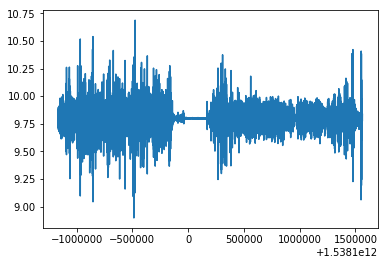

In [192]:
plt.plot(data.time, data.acceY)
plt.show()

In [193]:
data.shape

(27109, 5)

In [194]:
data.to_json("Predicted_Data/gfysqe.json", orient='records')

In [195]:
print(y_predict['anomaly'].unique())

['N' 'A']


In [196]:
data.describe()

,time,lat,lon,acceY
count,2.710900e+04,27109.000000,27109.000000,27109.000000
mean,1.538100e+12,6.752709,79.911369,9.799979
std,7.873285e+05,0.024471,0.022676,0.081968
min,1.538099e+12,6.726632,79.882187,8.898008
25%,1.538100e+12,6.731967,79.891420,9.763560
50%,1.538100e+12,6.740828,79.909682,9.800144
75%,1.538101e+12,6.774829,79.929522,9.836440
max,1.538102e+12,6.797831,79.956496,10.686956
